## Survey of the cinema destribution data

Data is provided by ministry of culture.

Based on the provided data it's required to analyze the market of the movies in the cinema theaters and determine the trends.

Additionaly it's required to analyze the movies with goverment support, and answer the questions.

### Step 1. Data load and merge of datasets.

In [1]:
import pandas as pd
import pylab as pl

In [2]:
# data loading
try:
    df_movies = pd.read_csv('mkrf_movies.csv')
    df_shows = pd.read_csv('mkrf_shows.csv')
except:
    df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
    df_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
# display of first five rows of datasets
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
df_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [5]:
# display short information on datasets
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [7]:
# changing of datatype of "puNumber" column
df_shows['puNumber'] = df_shows['puNumber'].astype('str')
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [8]:
# df merge
df_movies = df_movies.merge(df_shows,on ='puNumber',how='left')

In [9]:
# display of the results
df_movies.head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [10]:
# display of info on merged dataset
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Conclusion**

- Data sucessfully imported and datasets were merged in one dataset.

- Dataset has 7486 rows and 15 columns with object and float datatypes.


### Step 2. Data Preparation

#### Step 2.1. Data types check

In [11]:
# deletion of % symbol
df_movies['ratings'] = df_movies['ratings'].str.replace('%','')

# function declaration for reformating of rating column
def devide_ten (df_name):
    if df_name['ratings'] > 10:
        return df_name['ratings']/10
    else:
        return df_name['ratings']

# datatype changing and application of function
df_movies['ratings'] = df_movies['ratings'].astype('float')
df_movies['ratings'] = df_movies.apply(devide_ten, axis=1)

# display of unique results
df_movies['ratings'].sort_values().unique()

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.4, 9.7, 9.8, 9.9, nan])

In [12]:
# datatype change in colunmn show_start_date 
df_movies['show_start_date'] = pd.to_datetime(df_movies['show_start_date'],format='%Y-%m-%d')

# display the results
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [13]:
# changing of incorrect value of column "puNumber"
df_movies['puNumber'] = df_movies['puNumber'].str.replace('нет','-1')

# changing of column datatype
df_movies['puNumber'] = df_movies['puNumber'].astype('int')

# display the results
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int32              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Step 2.2. Nulls processing

In [14]:
# selection of columns with categorical values
temp = ['film_studio','director','producer','financing_source','production_country','genres']

# loop for fillup on null value
for n in temp:
    df_movies[n] = df_movies[n].fillna('unknown')

# selection of numeric columns  
temp = ['refundable_support','nonrefundable_support','budget','ratings','box_office']

# fillup nulls
for n in temp:
    df_movies[n] = df_movies[n].fillna(0)
    
# display the results
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int32              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     7486 non-null   float64            
 10  nonrefundable_support  7486 non-null   float64            
 11  budget                 7486 non-null   float64          

**All nulls in categorical coulmns were replaced with value "unknown', numeric - 0**

#### Step 2.3. Duplicates processing

In [15]:
# count of duplicates
print(df_movies.duplicated().count())

# count of duplicates in column puNumber
print(df_movies['puNumber'].drop_duplicates().count())

# selection of rows with duplicated value in column puNumber
temp = df_movies[df_movies['puNumber'].duplicated()].puNumber

# display of data with duplicates in column puNumber
for n in temp:
    print(n)
    display(df_movies[df_movies['puNumber'] == n])

7486
7484
221154310


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,7.0,"мелодрама,комедия",0.0
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,7.6,"драма,мелодрама,история",0.0


221054410


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,7.4,"комедия,криминал",0.0
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,6.8,"комедия,криминал",0.0


In [16]:
# display of uniques values of columns director and producer
print(df_movies.director.sort_values().unique())
print(df_movies.producer.sort_values().unique())

[' Йохан Нийенхейс' ' Н.Орлов, Р.Быков' ' Р.Асхаев' ...
 'хореография Пьера Лакотта по Филиппу Тальони'
 'хореография Фредерика Аштона' 'хореография Фредерика Эштона']
[' А.Шальопа' ' Г.Шпригов'
 ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит'
 ...
 'Яэль Абекассис, Мат Кирби, Мишель Киркман, Пабло Мелер, Брайан Дж. Фалконер, Стефан Эйхенбергер'
 'Яэль Бергман, Лаура Уотерс, Питер Хеллайар'
 'Яэль Фогель, Летиция Гонзалез']


***Cocnlusion***

- data set has no obvious duplicates
- there are some duplicates in several columns
- in column puNumber there are few duplicates, hovewer it's not required to delete/merge it. Issue qould be solved by clarification of the data with the person who created the table.
- in columns director and producer there are duplicates - it's normal, due to the fact that more than one movie could be filmed by same director/producer/country. Columns producer and director has impilicit duplicates, but for processing of 7k pcs will take a lot of time, issue also could be solved by the creater of table. 

#### Step 2.4. Categorical columns processing

In [17]:
# diaply of unique values of columns country, director, producer 
print(df_movies.genres.sort_values().unique(),'\n\n',
    df_movies.production_country.sort_values().unique(),'\n\n',
    df_movies.age_restriction.sort_values().unique())

# spaces deletion
df_movies.producer = df_movies.producer.str.strip()
df_movies.director = df_movies.director.str.strip()
df_movies.production_country = df_movies.production_country.str.strip()
df_movies.genres = df_movies.genres.str.strip()

['unknown' 'аниме,мультфильм' 'аниме,мультфильм,боевик'
 'аниме,мультфильм,детектив' 'аниме,мультфильм,драма'
 'аниме,мультфильм,комедия' 'аниме,мультфильм,короткометражка'
 'аниме,мультфильм,мелодрама' 'аниме,мультфильм,приключения'
 'аниме,мультфильм,ужасы' 'аниме,мультфильм,фантастика'
 'аниме,мультфильм,фэнтези' 'биография' 'биография,военный,драма'
 'биография,документальный' 'биография,драма' 'биография,драма,военный'
 'биография,драма,история' 'биография,драма,криминал' 'биография,история'
 'биография,история,драма' 'биография,криминал,драма'
 'биография,криминал,триллер' 'биография,мелодрама,драма'
 'биография,музыка,драма' 'биография,музыка,мюзикл'
 'биография,спорт,драма' 'биография,спорт,история'
 'биография,спорт,комедия' 'боевик' 'боевик,вестерн,приключения'
 'боевик,военный' 'боевик,военный,драма' 'боевик,военный,история'
 'боевик,детектив' 'боевик,драма' 'боевик,драма,биография'
 'боевик,драма,вестерн' 'боевик,драма,военный' 'боевик,драма,история'
 'боевик,драма,комедия'

**Categorical columns mainly has value of list of values, hovewer, formating, accuracy of data recording and punctiation shall be revised**

In [18]:
# display the unique values of columns movie type
df_movies.type.unique()

# spaces deletion
df_movies.type = df_movies.type.str.strip()

# display of uniaue values
df_movies.type.unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

#### Step 2.5. Numeric columns processing

In [19]:
# budget calculation function
def budget_check (df_name):
    if (df_name['refundable_support'] + df_name['nonrefundable_support']) > df_name['budget']:
        return(df_name['refundable_support'] + df_name['nonrefundable_support'])
    else:
        return (df_name['budget'])
    
df_movies['budget'] = df_movies.apply(budget_check,axis=1)

count    3.320000e+02
mean     1.314224e+08
std      1.871482e+08
min      6.000000e+06
25%      4.552480e+07
50%      7.119690e+07
75%      1.500000e+08
max      2.305074e+09
Name: budget, dtype: float64


Text(0, 0.5, 'quanity of movies')

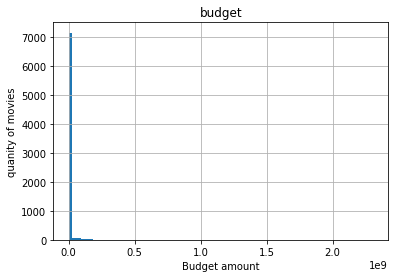

In [20]:
# diplay info on budget
print(df_movies.query('budget>0')['budget'].describe())

# plotting of hist for budget
df_movies.hist('budget',bins = 100, range =(0,df_movies.budget.max()))
pl.xlabel("Budget amount")
pl.ylabel("quanity of movies")

Text(0, 0.5, 'quanity of movies')

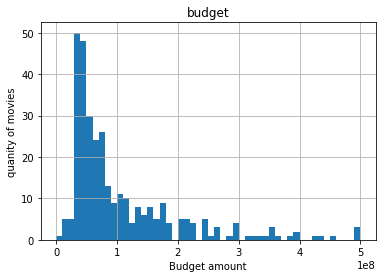

In [21]:
# rescaling
df_movies.hist('budget',bins = 50, range =(100,500000000))
pl.xlabel("Budget amount")
pl.ylabel("quanity of movies")

count    1.110000e+02
mean     3.548649e+07
std      3.197288e+07
min      3.500000e+06
25%      1.500000e+07
50%      2.500000e+07
75%      5.000000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64


Text(0, 0.5, 'quanity of movies')

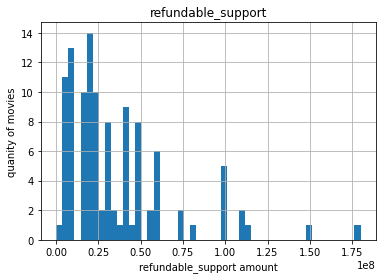

In [22]:
# display info on column refundable_support
print(df_movies.query('refundable_support>0')['refundable_support'].describe())

# plotting of histogram
df_movies.hist('refundable_support',bins = 50, range =(1,df_movies.refundable_support.max()))
pl.xlabel("refundable_support amount")
pl.ylabel("quanity of movies")

count    3.230000e+02
mean     5.034578e+07
std      6.024321e+07
min      3.000000e+06
25%      2.500000e+07
50%      3.000000e+07
75%      4.500000e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64


Text(0, 0.5, 'quanity of movies')

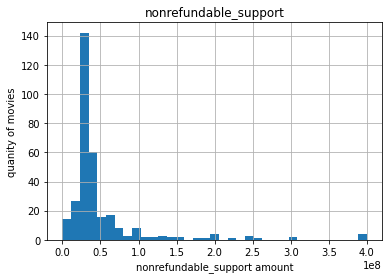

In [23]:
# display info on column nonrefundable_support
print(df_movies.query('nonrefundable_support>0')['nonrefundable_support'].describe())

# # plotting of histogram
df_movies.hist('nonrefundable_support',bins = 35, range =(1,df_movies.nonrefundable_support.max()))
pl.xlabel("nonrefundable_support amount")
pl.ylabel("quanity of movies")

count    6519.000000
mean        6.488173
std         1.114638
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.900000
Name: ratings, dtype: float64


Text(0, 0.5, 'quanity of movies')

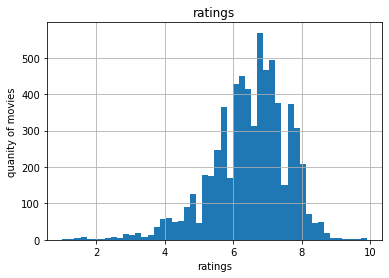

In [24]:
# display info on column ratings
print(df_movies.query('ratings>0')['ratings'].describe())

# histogram plotting
df_movies.hist('ratings',bins = 50, range =(1,df_movies.ratings.max()))
pl.xlabel("ratings")
pl.ylabel("quanity of movies")

count    3.134000e+03
mean     7.706437e+07
std      2.411784e+08
min      4.000000e+01
25%      1.010288e+05
50%      2.409099e+06
75%      2.456979e+07
max      3.073569e+09
Name: box_office, dtype: float64


Text(0, 0.5, 'quanity of movies')

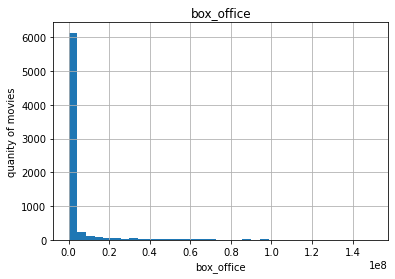

In [25]:
# display info on column box_office
print(df_movies.query('box_office>0')['box_office'].describe())

# histogram plotting
df_movies.hist('box_office',bins = 35, range =(0,150000000))
pl.xlabel("box_office")
pl.ylabel("quanity of movies")

Text(0, 0.5, 'quanity of movies')

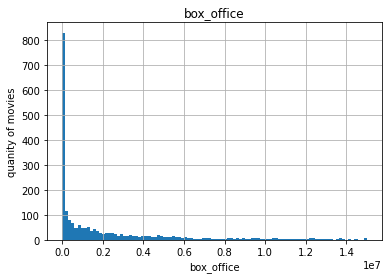

In [26]:
# rescale
df_movies.hist('box_office',bins = 100, range =(100,15000000))
pl.xlabel("box_office")
pl.ylabel("quanity of movies")

**Conclusions:**

- Values in column refundable_support are destributed in accordance with Poisson's law, irregular values are not found.
- Values in column nonrefundable_support are destributed in accordance with Poisson's law,  irregular values are not found.
- Values in column budget are destributed in accordance with Poisson's law,  irregular values are not found.
- Values in column ratings are destributed in accordance with Poisson's law, but in opposite direcction,  irregular values are not found.
- Values in columnbox_office are destributed in accordance with Poisson's law,  irregular values are not found.


#### Step 2.6. Creation of new columns




- Separation of year from issuance date

In [27]:
# add new column - year
df_movies['year_start_date'] = df_movies['show_start_date'].dt.year

# display head of df
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_start_date
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,7.2,"боевик,драма,мелодрама",0.0,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0.0,0.0,0.0,unknown,6.6,"драма,военный",0.0,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,"фантастика,боевик,триллер",0.0,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,"фантастика,боевик,триллер",0.0,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,"фантастика,боевик,триллер",0.0,2015


- Create two columns: - extract name of leading director and leading country. (first values of list).


In [28]:
# function for selection of first value from the list
def select_first (array):
    return(array.split(',',1)[0])

# add a new column with leading genre
df_movies['main_genre'] =  df_movies['genres'].apply(select_first)


# function for selection of first value, separated with dash symbol
def select_first_1 (array):
    return(array.split('-',1)[0])

# add a new column with lead production country
df_movies['main_country'] =  df_movies['production_country'].apply(select_first_1)

# dicplay the results
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_start_date,main_genre,main_country
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,7.2,"боевик,драма,мелодрама",0.0,2015,боевик,США
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0.0,0.0,0.0,unknown,6.6,"драма,военный",0.0,2016,драма,СССР
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,"фантастика,боевик,триллер",0.0,2016,фантастика,США
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,"фантастика,боевик,триллер",0.0,2016,фантастика,США
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,"фантастика,боевик,триллер",0.0,2015,фантастика,США


- Calculation of percentage of goverment support to total movie budget.

In [29]:
# add a new column
df_movies['goverment_support'] = round((df_movies['refundable_support']  + df_movies['nonrefundable_support']) / df_movies['budget']*100,0)

# display the results
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_start_date,main_genre,main_country,goverment_support
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,7.2,"боевик,драма,мелодрама",0.0,2015,боевик,США,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0.0,0.0,0.0,unknown,6.6,"драма,военный",0.0,2016,драма,СССР,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,"фантастика,боевик,триллер",0.0,2016,фантастика,США,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,"фантастика,боевик,триллер",0.0,2016,фантастика,США,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,"фантастика,боевик,триллер",0.0,2015,фантастика,США,NaN


### Step 3. Exploratory data analysis


- Analyze the qauntity of issued movies per year. Notice, not every movie has box office information. Calculate the percentage of movies with specified box office information from total quantity.

Text(0, 0.5, 'movies quantity')

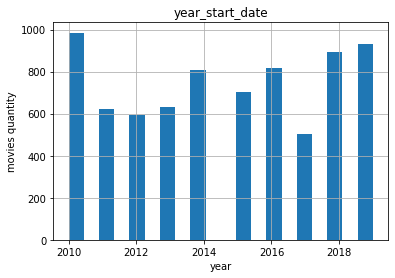

In [30]:
# histogram plotting - quantity of movies per year 
df_movies.hist(column = 'year_start_date',grid=True, bins=20 ,range = (df_movies.year_start_date.min(),df_movies.year_start_date.max()))
pl.xlabel("year")
pl.ylabel("movies quantity")

доля фильмов с данными о прокате: 0.42


year_start_date
2010    2.428654e+06
2012    6.955423e+06
2011    1.410276e+07
2013    2.979971e+07
2014    7.444952e+09
2015    3.949737e+10
2016    4.786630e+10
2019    4.842571e+10
2017    4.856371e+10
2018    4.966840e+10
Name: box_office, dtype: float64

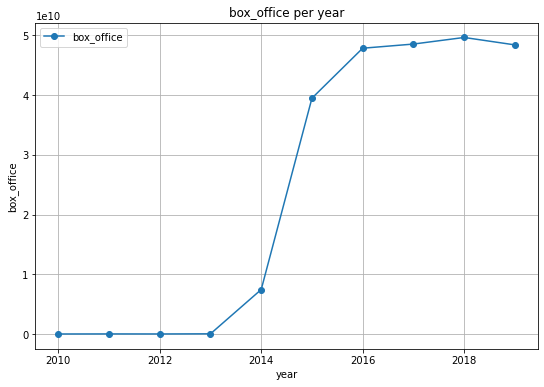

In [31]:
# Display the percentage of movies with info on box office
print('доля фильмов с данными о прокате:', round((df_movies.query('box_office > 0').title.count()/df_movies.title.count()),2))

# plotting histogram on box office per year
df_box_office = df_movies.query('box_office > 0')
df_box_office.groupby('year_start_date')['box_office'].sum().plot(x='year_start_date', y ='box_office', style = 'o-',grid = True, legend = True,figsize = (9,6))
pl.xlabel("year")
pl.title("box_office per year")
pl.ylabel("box_office")

# display the pivot table with box office per year
df_movies.query('box_office > 0').groupby('year_start_date')['box_office'].sum().sort_values()

- Analyze the dynamic of box office during years. When the amount of box office were lowest and when highest?

**Box office dynamics**

- statistic on all movies, including the movies w/o info on box office is following:

1) in 2010 almost the 1000 movies were issued

2) in period starting from 2011 to 2013 600 movies were issued per year

3) in 2014 and 2016 the 800 movies were issued 

4) in 2015 the quantity of issued movies is near to 700

5) in 2017 year 500 movies were issued

6) in 2018 and 2019 were issued around 900 movies

**Box office statistic is following:**

- the lowest box office amount was in 2010 and is equeal to 2.428654e+06
- the highest box office amount was in 2018 and is equal to 4.966840e+10


- Using pivot table calculate the averade and median values of box office per year.

In [32]:
# display the average and median values on box office 
display(df_movies.query('box_office > 0').pivot_table(index = 'year_start_date',values = 'box_office',
                                                      aggfunc = ['mean','median']))

,mean,median
,box_office,box_office
year_start_date,,
2010,2.404608e+04,1710.000
2011,1.293832e+05,3000.000
2012,5.654815e+04,6220.000
2013,1.664788e+05,3580.000
2014,2.727089e+07,20400.000
2015,8.549213e+07,5003450.150
2016,9.117390e+07,3915041.020
2017,1.360328e+08,9968340.000


**The table above represent the statistic on the average and median values of box office pre year**

The lowest indecies were in 2010, the highest in 2017

- Define how does the age restriction affect on box office of movies during 2015-2019.
- What type of age restriction has highest box office?
- Does it changing year by year?

,sum
,box_office
age_restriction,
«0+» - для любой зрительской аудитории,8.090774e+08
«12+» - для детей старше 12 лет,6.061945e+10
«16+» - для детей старше 16 лет,7.603473e+10
«18+» - запрещено для детей,4.075962e+10
«6+» - для детей старше 6 лет,5.579861e+10


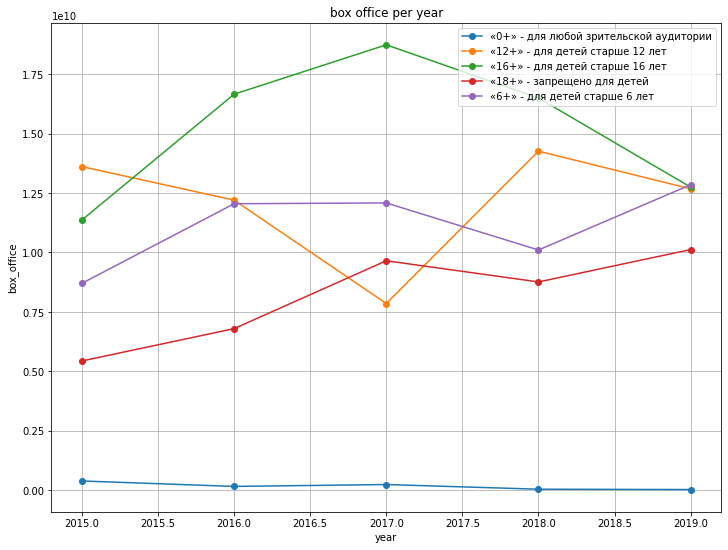

In [33]:
# выберем года с 2015 по 2019
years = [2015,2016,2017,2018,2019]

# присовим переменной список из уникальных значений столбца возрастных ограничений 
ages = df_movies.age_restriction.sort_values().unique()

# выведем на экран общие сборы по каждому значению столбца возрастных ограничений
display(df_movies.query('year_start_date in @years').pivot_table(index = ['age_restriction'],values = 'box_office',aggfunc = ['sum']))

# создадим цикл для создания графика с изменением сборов по годам в зависимости от значения столбца возрастных ограничений
for age in ages:
    df_temp = df_movies.query('age_restriction == @age and year_start_date in @years').groupby('year_start_date')['box_office'].sum()
    df_temp.plot(style='o-',grid='True', figsize=(12,9))
    legend = age
    pl.legend(ages)
    pl.xlabel("year")
    pl.ylabel("box_office")
    pl.title("box office per year")
    

**Statistic of box office by age restriction**

- the lowest popularity has the movies w/o restrictions, the box office has a reduction every year.
- movies with restriction 6+ has overal growth (from 0,5 le10  in 2015 to 1,25 le10 in 2019). Most likely it is animated films.
- movies with restriction 12+ and 16+ has similar indecies, we can assume the the growth of box office for movies in 2017 year 16+ has affected on reduction of box office of movies 12+. Most likely this categaries is a fantasy movies.
- Box office for movies with restriction 18+  has growth every year.

### Step 4. Analyze the movies with goverment support

Conduct the analysis and calculate the amount of goverment support.
Chechk the ROI indecies and rating of suchmovies.

In [34]:
# calculation of total amount of gov support
sum_gov_support = df_movies.refundable_support.sum() + df_movies.nonrefundable_support.sum()

# calculatio of total qty of movies qith goverment support
qty_gov_support = df_movies.query('refundable_support >0').refundable_support.count() + df_movies.query('nonrefundable_support>0').nonrefundable_support.count()

print('movies with refundable support',df_movies.query('refundable_support >0').refundable_support.describe(), 
      '\n','movies with nonrefundable support',
      df_movies.query('nonrefundable_support >0').nonrefundable_support.describe()) 

# display of the gov support statistic by the year
print('sum = ',sum_gov_support,'\n'
     ,'quantity = ',qty_gov_support,'\n'
     ,'average = ',round(sum_gov_support/qty_gov_support,2),'\n\n'
      ,df_movies.groupby('year_start_date').refundable_support.sum(),'\n\n'
      ,df_movies.groupby('year_start_date').nonrefundable_support.sum())

movies with refundable support count    1.110000e+02
mean     3.548649e+07
std      3.197288e+07
min      3.500000e+06
25%      1.500000e+07
50%      2.500000e+07
75%      5.000000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64 
 movies with nonrefundable support count    3.230000e+02
mean     5.034578e+07
std      6.024321e+07
min      3.000000e+06
25%      2.500000e+07
50%      3.000000e+07
75%      4.500000e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64
sum =  20200688312.0 
 quantity =  434 
 average =  46545364.77 

 year_start_date
2010            0.0
2011            0.0
2012            0.0
2013            0.0
2014     71000000.0
2015    637153119.0
2016    921500000.0
2017    719346881.0
2018    662000000.0
2019    928000000.0
Name: refundable_support, dtype: float64 

 year_start_date
2010    0.000000e+00
2011    0.000000e+00
2012    0.000000e+00
2013    1.343479e+08
2014    5.010023e+08
2015    3.019088e+09
2016    3.381655e+09
2017  

**Conclusion**
- total qty of movies with goverment support is 434 
- total amount of goverment soppurt is 20.200.688.312
- average amount of goverment support is:  46 545 364.77
- minimum and maximum amounts of refundable support is: 1.110000e+02 и  1.800000e+08
- min and max of unrefoundable goverment support is: 5.034578e+07 и  4.000000e+08

In [35]:
# calculation of ROI
df_gov_support = df_movies.query('goverment_support > 0').copy()
print('процент фильмов с гос поддержкой:',int(round(df_gov_support.title.count()/df_movies.title.count(),2)*100),'%','\n')
df_gov_support['ROI'] = (df_gov_support['box_office'] / df_gov_support['budget'])
print(df_gov_support['ROI'].describe())

процент фильмов с гос поддержкой: 4 % 

count    332.000000
mean       0.791000
std        1.659904
min        0.000000
25%        0.015875
50%        0.148018
75%        0.933302
max       19.209804
Name: ROI, dtype: float64


**More than 75% of movies has negative ROI index**

count    3.320000e+02
mean     1.268479e+08
std      3.287626e+08
min      0.000000e+00
25%      9.094312e+05
50%      1.214419e+07
75%      1.031074e+08
max      3.073569e+09
Name: box_office, dtype: float64 



Text(0.5, 0, 'box_office')

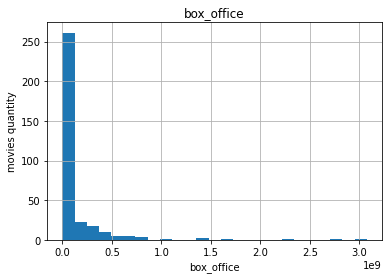

In [36]:
# box office analyzis

print(df_movies.query('goverment_support > 0')['box_office'].describe(),'\n')

df_movies.query('goverment_support > 0').hist(column = 'box_office', bins = 25)
pl.ylabel("movies quantity")
pl.xlabel("box_office")

Text(0.5, 0, 'box_office')

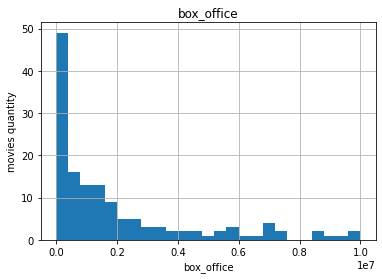

In [37]:
# rescale
df_movies.query('goverment_support > 0').hist(column = 'box_office', bins = 25, range = (1,10000000))
pl.ylabel("movies quantity")
pl.xlabel("box_office")

- max amount of box office of movie with goverment support is 3.073569e+09
- min amount is 0 
- median value 12 144 193.5

count    332.000000
mean       5.730723
std        1.710008
min        0.000000
25%        5.200000
50%        6.100000
75%        6.700000
max        9.400000
Name: ratings, dtype: float64


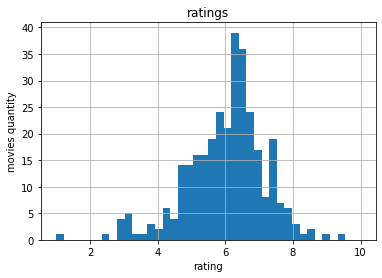

In [38]:
# plotting of historam with rating of movies with goverment support
df_movies.query('goverment_support > 0').hist(column = 'ratings', bins = 40, range = (1,10))
pl.ylabel("movies quantity")
pl.xlabel("rating")


# display the rating information 
print(df_movies.query('goverment_support > 0')['ratings'].describe())

- Maximal rating is 9,4
- Minimal - 1,71
- Median value 6,1

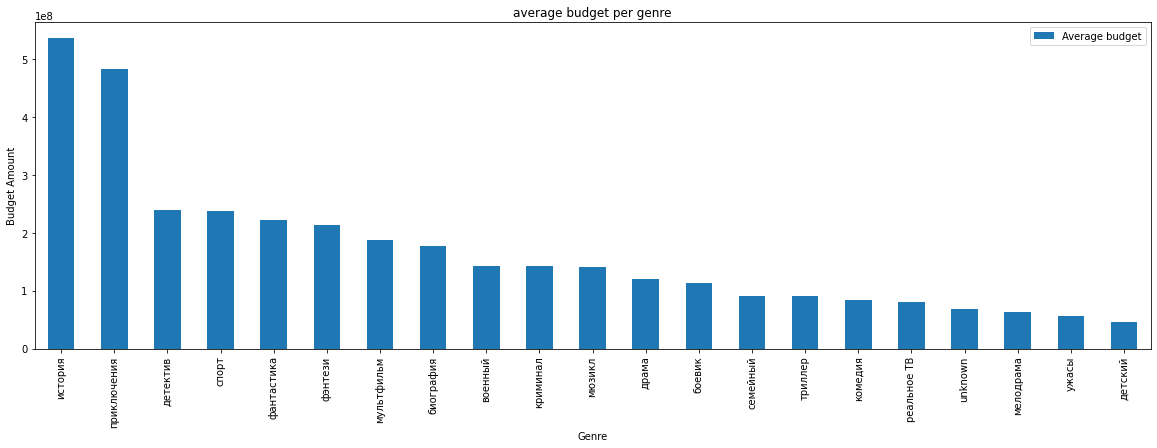

In [39]:
# histogram plotting of average budget per genre of movie with goverment support

df_genre_budget = df_movies.query('goverment_support > 0').pivot_table(index = 'main_genre',values = 'budget',aggfunc = ['mean'])
df_genre_budget.columns = ['Average budget']
df_genre_budget.sort_values(by = 'Average budget', ascending = False).plot(kind = 'bar', figsize =(20,6))
pl.ylabel("Budget Amount")
pl.xlabel("Genre")
pl.title('average budget per genre');

### Step 5.  General conclusion

1) The analysis has revealed that box office increased every year, the highest growth was in 2014 and has changed form  0,8е+10 to 4е+10

2) the lowest and highest indecies of box office were in 2010 and 2017 years, and are following:

- 2010 | 2.404608e+04	 | 1.710
- 2017 | 1.360328e+08 |	9.968.340

3) The most popular types of movies with age restriction is following categories: 6+ , 12+, 16+. These genres has similar populary and cempete to each other every year, leadin position is always changing. The less popular movies are movies with 18+ age restriction, and the lowest popularity have movies with age restriction +.

4) only 4% movies has goverment support:
 - total quantity is 434 movies
 - total amount of goverment support is 20.200.688.312
 - average amount per movie - 46 545 364.77
 - percentage of movies with positive ROI - 25%
 - Median value of box office amount is 12 144 193.5, wich 4 times lower than average amoun of goverment support.
 - more than a half of movies has rating 6,1 (average and lower)
